<p><font size="6"><b>Plotnine: Introduction </b></font></p>


> *DS Data manipulation, analysis and visualisation in Python*  
> *December, 2017*

> *© 2016, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---


In [1]:
%matplotlib inline

import pandas as pd

# Plotnine

http://plotnine.readthedocs.io/en/stable/

* Built on top of Matplotlib, but providing
    1. High level functions
    2. Implementation of the [Grammar of Graphics](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448), which became famous due to the `ggplot2` R package 
    3. The syntax is highly similar to the `ggplot2` R package
* Works well with Pandas

In [2]:
import plotnine as pn

C:\Users\rprops\Documents\Anaconda3\envs\DS-python-data-analysis\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Introduction

We will use the Titanic example data set:

In [3]:
titanic = pd.read_csv('../data/titanic.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's consider following question:
>*For each class at the Titanic, how many people survived and how many died?*

Hence, we should define the *size* of respectively the zeros (died) and ones (survived) groups of column `Survived`, also grouped by the `Pclass`. In Pandas terminology:

In [5]:
survived_stat = titanic.groupby(["Pclass", "Survived"]).size().rename('count').reset_index()
survived_stat
# Remark: the `rename` syntax is to provide the count column a column name 

,Pclass,Survived,count
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


Providing this data in a bar chart with pure Pandas is still partly supported (e.g. the `by` option in the plot):

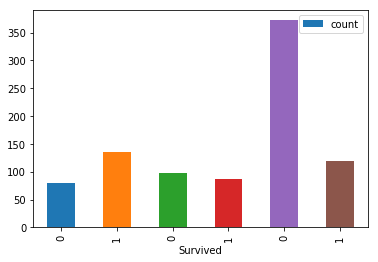

In [6]:
survived_stat.plot(x='Survived', y='count', kind='bar', by='Pclass')
## A possible other way of plotting this could be using groupby again:   
# survived_stat.groupby('Pclass').plot(x='Survived', y='count', kind='bar') # (try yourself by uncommenting)

but with mixed results...

Plotting libraries focussing on the **grammar of graphics** are really targeting these *grouped* plots. For example, the plotting of the resulting counts can be expressed in the grammar of graphics:

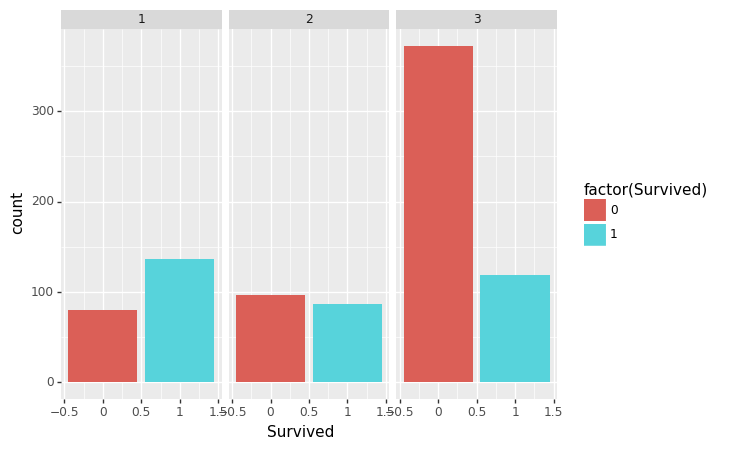

<ggplot: (53495428742)>

In [7]:
(pn.ggplot(survived_stat, 
           pn.aes(x='Survived', y='count', fill='factor(Survived)'))
    + pn.geom_bar(stat='identity', position='dodge')
    + pn.facet_wrap(facets='Pclass'))

Moreover, these `count` operations are embedded in the typical Grammar of Graphics packages and we can do these operations directly on the original `titanic` data set in a single coding step:

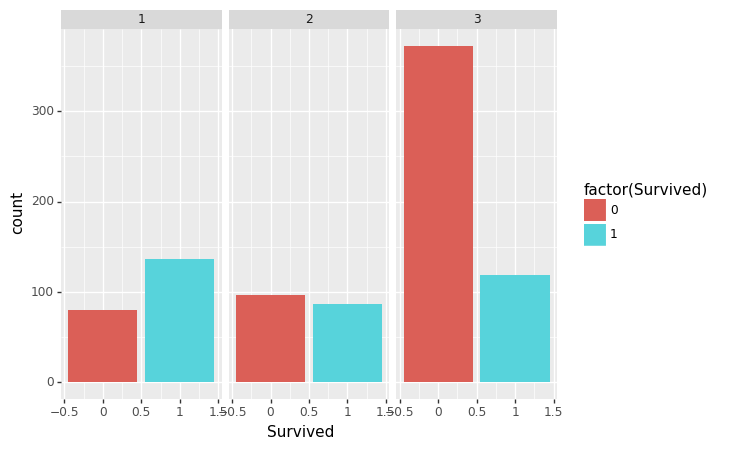

<ggplot: (53492869640)>

In [8]:
(pn.ggplot(titanic,
           pn.aes(x='Survived', fill='factor(Survived)'))
    + pn.geom_bar(stat='count', position='dodge')
    + pn.facet_wrap(facets='Pclass'))

<div class="alert alert-info">

 <b>Remember</b>: 

 <ul>
    <li>The <b>Grammar of Graphics</b> is especially suitbale for these so-called [`tidy`](http://vita.had.co.nz/papers/tidy-data.pdf) dataframe representations (check [here](#this_is_tidy) for more about `tidy` data)</li>
  <li>`plotnine` is a library that supports the Grammar of graphics</li>
</ul>
<br>

</div>

## Building a plotnine graph

Building plots with plotnine is typically an iterative process. As illustrated in the introduction, a graph is setup by layering different elements on top of each other using the `+` operator. putting everything together in brackets `()` provides Python-compatible syntax.

#### data

* Bind the plot to a specific data frame using the data argument:

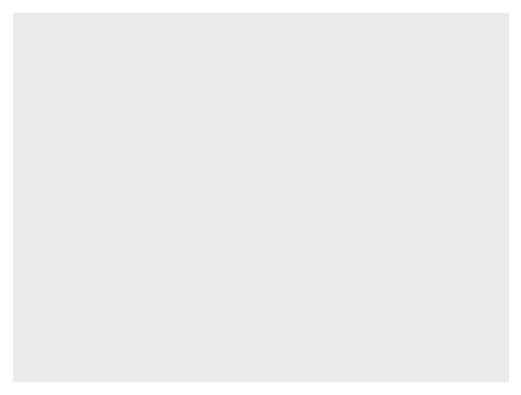

<ggplot: (53492989304)>

In [10]:
(pn.ggplot(data=titanic))

We haven 't defined anything else, so just an empty *figure* is available.

#### aesthestics

 
* Define aesthetics (**aes**), by **selecting variables** used in the plot and linking them to presentation such as plotting size, shape color, etc. You can interpret this as: **how** the variable will influence the plotted objects/geometries:

The most important `aes` are: `x`, `y`, `alpha`, `color`, `colour`, `fill`, `linetype`, `shape`, `size` and `stroke`

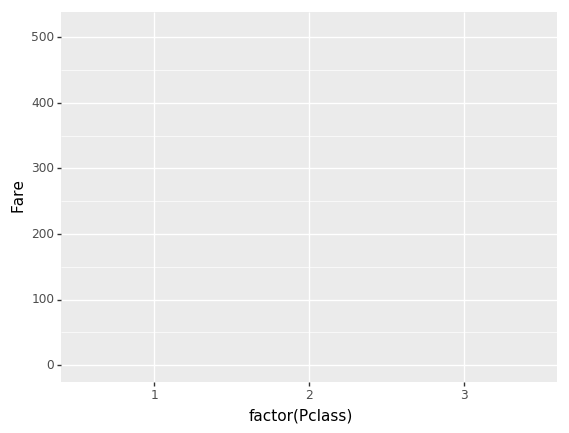

<ggplot: (-9223371983361849365)>

In [11]:
(pn.ggplot(titanic,
           pn.aes(x='factor(Pclass)', y='Fare')))

#### geometry

* Still nothing plotted yet, as we have to define what kind of [**geometry**](http://plotnine.readthedocs.io/en/stable/api.html#geoms) will be used for the plot. The easiest is probably using points:

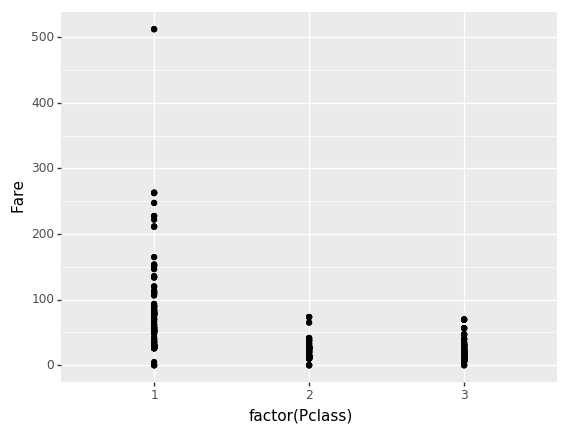

<ggplot: (53492809469)>

In [12]:
(pn.ggplot(titanic,
           pn.aes(x='factor(Pclass)', y='Fare'))
     + pn.geom_point()
) 

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Starting from the code of the last figure, adapt the code in such a way that the `Sex` variable defines the **color** of the points in the graph. </li>
  <li>As both sex categories overlap, use an alternative geometry, so called `geom_jitter` </li>
</ul>
</div>

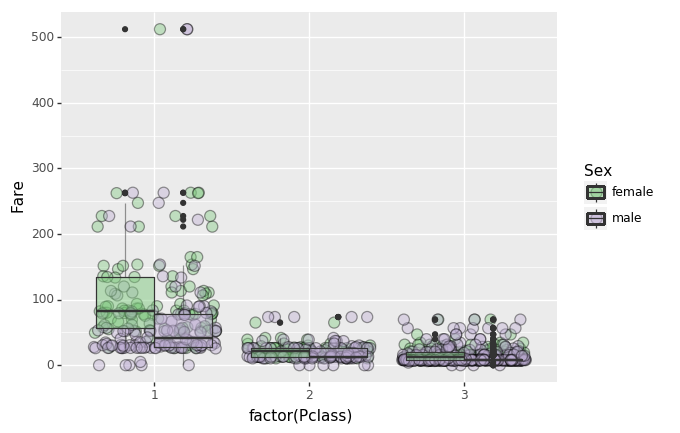

<ggplot: (53496352204)>

In [34]:
(pn.ggplot(titanic,
           pn.aes(x='factor(Pclass)', y='Fare', fill = "Sex"))
     + pn.geom_jitter(color = "black", size = 4, alpha = 0.4)
     + pn.scale_fill_brewer(palette = "Accent", type = 'qual')
     + pn.geom_boxplot(alpha =0.5)
) 

In [13]:
# %load _solutions/visualization_02_plotnine12.py

These are the basic elements to have a graph, but other elements can be added to the graph:

#### labels

* Change the [**labels**](http://plotnine.readthedocs.io/en/stable/api.html#Labels):

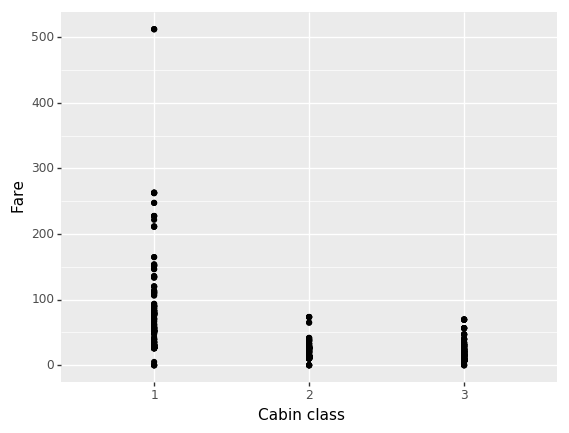

<ggplot: (53495856248)>

In [35]:
(pn.ggplot(titanic,
           pn.aes(x='factor(Pclass)', y='Fare'))
     + pn.geom_point()
     + pn.xlab("Cabin class")
) 

#### facets

* Use the power of `groupby` and define [**facets**](http://plotnine.readthedocs.io/en/stable/api.html#facets) to group the plot by a grouping variable:

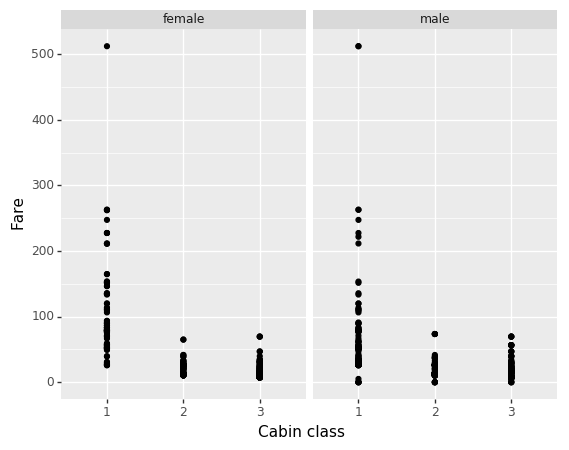

<ggplot: (-9223371983358756348)>

In [36]:
(pn.ggplot(titanic,
           pn.aes(x='factor(Pclass)', y='Fare'))
     + pn.geom_point()
     + pn.xlab("Cabin class")
     + pn.facet_wrap('Sex')#, dir='v')
) 

#### scales

* Defining [**scale**](http://plotnine.readthedocs.io/en/stable/api.html#scales) for colors, axes,...

For example, a log-version of the y-axis could support the interpretation of the lower numbers:

C:\Users\rprops\Documents\Anaconda3\envs\DS-python-data-analysis\lib\site-packages\plotnine\scales\scale.py:516: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)


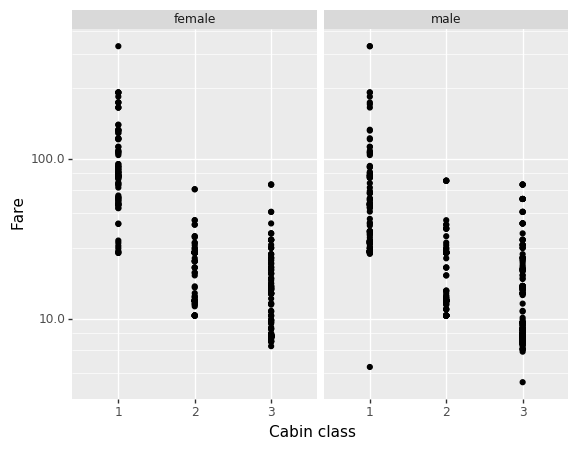

<ggplot: (-9223371983359073820)>

In [37]:
(pn.ggplot(titanic,
           pn.aes(x='factor(Pclass)', y='Fare'))
     + pn.geom_point() 
     + pn.xlab("Cabin class")
     + pn.facet_wrap('Sex')
     + pn.scale_y_log10()
) 

#### theme

* Changing [**theme **](http://plotnine.readthedocs.io/en/stable/api.html#themes):

C:\Users\rprops\Documents\Anaconda3\envs\DS-python-data-analysis\lib\site-packages\plotnine\scales\scale.py:516: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)


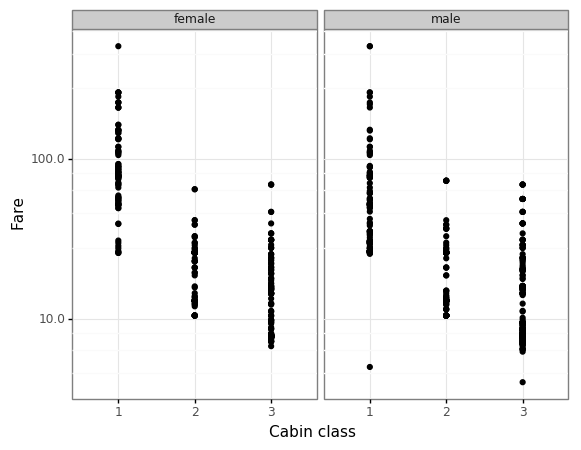

<ggplot: (53497935182)>

In [38]:
(pn.ggplot(titanic,
           pn.aes(x='factor(Pclass)', y='Fare'))
     + pn.geom_point() 
     + pn.xlab("Cabin class")
     + pn.facet_wrap('Sex')
     + pn.scale_y_log10()
     + pn.theme_bw()
) 

or changing specific [theming elements](http://plotnine.readthedocs.io/en/stable/api.html#Themeables), e.g. text size:

C:\Users\rprops\Documents\Anaconda3\envs\DS-python-data-analysis\lib\site-packages\plotnine\scales\scale.py:516: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)


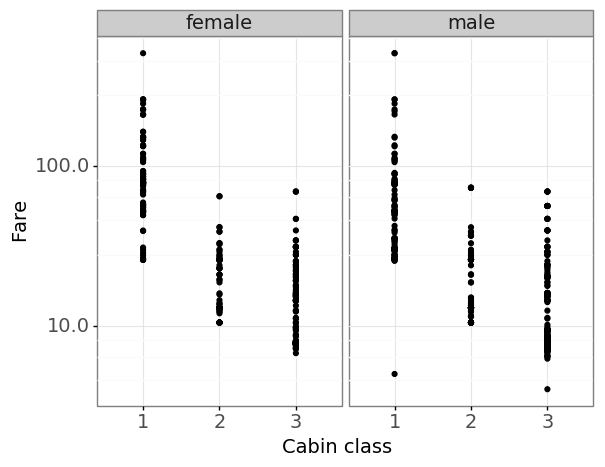

<ggplot: (-9223371983358824851)>

In [39]:
(pn.ggplot(titanic,
           pn.aes(x='factor(Pclass)', y='Fare'))
     + pn.geom_point() 
     + pn.xlab("Cabin class")
     + pn.facet_wrap('Sex')
     + pn.scale_y_log10()
     + pn.theme_bw()
     + pn.theme(text=pn.element_text(size=14))
) 

#### more...

* adding [**statistical derivatives**](http://plotnine.readthedocs.io/en/stable/api.html#stats)
* changing the [**plot coordinate**](http://plotnine.readthedocs.io/en/stable/api.html#coordinates) system

<div class="alert alert-info">

 <b>Remember</b>: 

 <ul>
    <li>Start with defining your `data`, `aes` variables and a `geometry`</li>
  <li>Further extend your plot with `scale_*`, `theme_*`, `xlab/ylab`, `facet_*`</li>
</ul>
<br>

</div>

## plotnine is built on top of Matplotlib

As plotnine is built on top of Matplotlib, we can still retrieve the matplotlib `figure` object from plotnine for eventual customization:

In [40]:
myplot = (pn.ggplot(titanic, 
                    pn.aes(x='factor(Pclass)', y='Fare'))
     + pn.geom_point()
) 

The trick is to use the `draw()` function in plotnine:

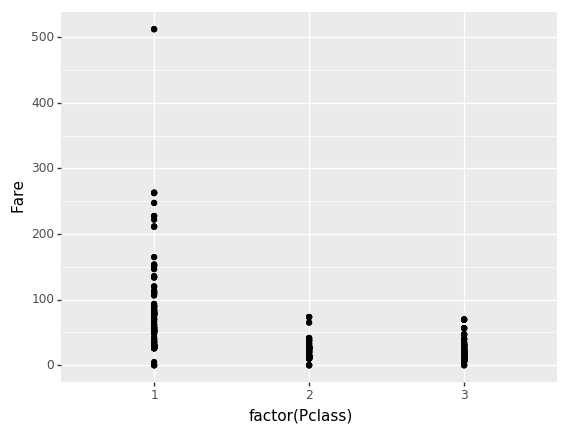

In [41]:
my_plt_version = myplot.draw()

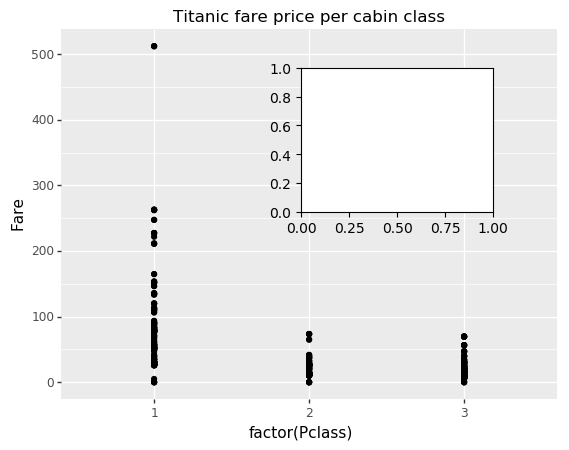

In [42]:
my_plt_version.axes[0].set_title("Titanic fare price per cabin class")
ax2 = my_plt_version.add_axes([0.5, 0.5, 0.3, 0.3], label="ax2")
my_plt_version

<div class="alert alert-info" style="font-size:18px">

 <b>Remember</b>: 

Similar to Pandas handling above, we can set up a matplotlib `Figure` wit plotnine. Use `draw()` and the Matplotlib `Figure` is returned.

</div>

## (OPTIONAL SECTION) Some more plotnine functionalities to remember...

**Histogram**: Getting the univariaite distribution of the `Age`

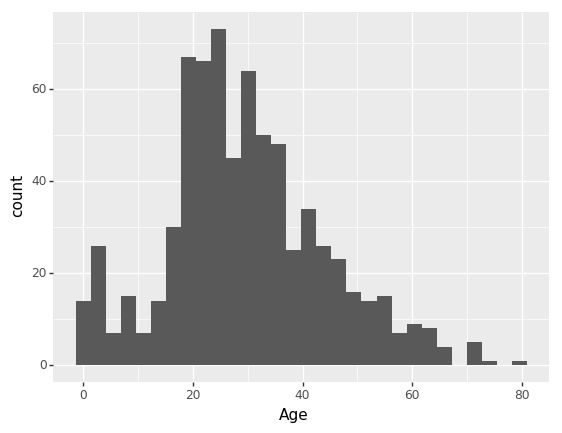

<ggplot: (-9223371983356968732)>

In [43]:
(pn.ggplot(titanic.dropna(subset=['Age']), pn.aes(x='Age'))
     + pn.geom_histogram(bins=30))

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Make a histogram of the age, grouped by the `Sex` of the passengers</li>
  <li>Make sure both graphs are underneath each other instead of next to each other to enhance comparison</li>

</ul>
</div>

In [44]:
# %load _solutions/visualization_02_plotnine22.py

**boxplot/violin plot**: Getting the univariaite distribution of `Age` per `Sex`

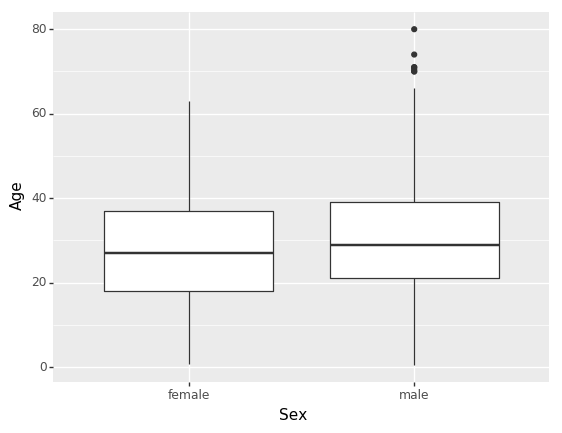

<ggplot: (-9223371983358423734)>

In [45]:
(pn.ggplot(titanic.dropna(subset=['Age']), pn.aes(x='Sex', y='Age'))
     + pn.geom_boxplot())

Actually, a *violinplot* provides more inside to the distribution:

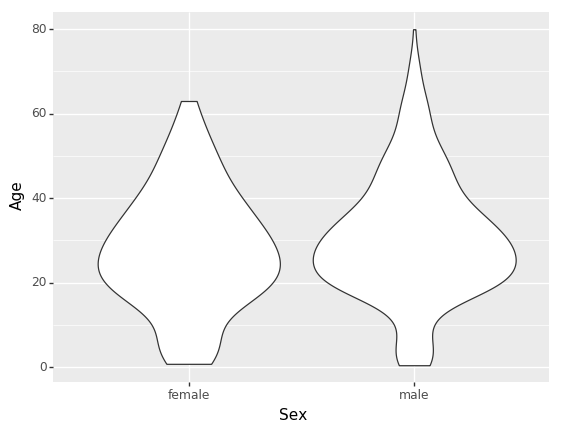

<ggplot: (-9223371983359064369)>

In [46]:
(pn.ggplot(titanic.dropna(subset=['Age']), pn.aes(x='Sex', y='Age'))
     + pn.geom_violin()
)

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Make a violin plot of the Age for each `Sex`</li>
  <li>Add `jitter` to the plot to see the actual data points</li>
  <li>Adjust the transparency of the jitter dots to improve readability</li>

</ul>
</div>

In [47]:
# %load _solutions/visualization_02_plotnine25.py

**regressions**

plotnine supports a number of statistical functions with the [`geom_smooth` function]:(http://plotnine.readthedocs.io/en/stable/generated/plotnine.stats.stat_smooth.html#plotnine.stats.stat_smooth)

The available methods are:
```
* 'auto'       # Use loess if (n<1000), glm otherwise
* 'lm', 'ols'  # Linear Model
* 'wls'        # Weighted Linear Model
* 'rlm'        # Robust Linear Model
* 'glm'        # Generalized linear Model
* 'gls'        # Generalized Least Squares
* 'lowess'     # Locally Weighted Regression (simple)
* 'loess'      # Locally Weighted Regression
* 'mavg'       # Moving Average
* 'gpr'        # Gaussian Process Regressor
```

each of these functions are provided by existing Python libraries and integrated in plotnine, so make sure to have these dependencies installed (read the error message!)

In [ ]:
(pn.ggplot(titanic.dropna(subset=['Age', 'Sex', 'Fare']), pn.aes(x='Fare', y='Age', color="Sex"))
     + pn.geom_point()
     + pn.geom_rug(alpha=0.2)
     + pn.geom_smooth(method='lm')
)

In [ ]:
(pn.ggplot(titanic.dropna(subset=['Age', 'Sex', 'Fare']), pn.aes(x='Fare', y='Age', color="Sex"))
     + pn.geom_point()
     + pn.geom_rug(alpha=0.2)
     + pn.geom_smooth(method='lm')
     + pn.facet_wrap("Survived")
     + pn.scale_color_brewer(type="qual")
)

# Need more plotnine inspiration? 

<div class="alert alert-info" style="font-size:18px">

 <b>Remember</b>(!)

<ul>
  <li>[plotnine gallery ](http://plotnine.readthedocs.io/en/stable/gallery.html) and [great documentation](http://plotnine.readthedocs.io/en/stable/api.html)</li>
</ul>
<br>
Important resources to start from!

</div>

<a id='this_is_tidy'></a>

# What the f* is `tidy`?

If you're wondering what *tidy* data representations are, you can read the scientific paper by Hadley Wickham, http://vita.had.co.nz/papers/tidy-data.pdf. 

Here, we just introduce the main principle very briefly:

Compare:

#### un-tidy
        
| WWTP | Treatment A | Treatment B |
|:------|-------------|-------------|
| Destelbergen | 8.  | 6.3 |
| Landegem | 7.5  | 5.2 |
| Dendermonde | 8.3  | 6.2 |
| Eeklo | 6.5  | 7.2 |

*versus*

#### tidy

| WWTP | Treatment | pH |
|:------|:-------------:|:-------------:|
| Destelbergen | A  | 8. |
| Landegem | A  | 7.5 |
| Dendermonde | A  | 8.3 |
| Eeklo | A  | 6.5 |
| Destelbergen | B  | 6.3 |
| Landegem | B  | 5.2 |
| Dendermonde | B  | 6.2 |
| Eeklo | B  | 7.2 |

This is sometimes also referred as *short* versus *long* format for a specific variable... Plotnine (and other grammar of graphics libraries) work better on `tidy` data, as it better supports `groupby`-like transactions!

<div class="alert alert-info" style="font-size:16px">

 <b>Remember:</b>
 
 <br><br>
 
 A tidy data set is setup as follows:
 
    <ul>
      <li>Each <code>variable</code> forms a <b>column</b> and contains <code>values</code></li>
      <li>Each <code>observation</code> forms a <b>row</b></li>
        <li>Each type of <code>observational unit</code> forms a <b>table</b>.</li>
    </ul>
</div>

